In [1]:
import matplotlib.pyplot as plt      #시각화를 위한 설치
import matplotlib.font_manager as fm    # 한글 폰트
import matplotlib                   #시각화를 위한 설치
import os, warnings  
import pandas as pd                #구조 변경 및 결합을 하기 위한 설치
import seaborn as sns              #시각화를 위한 설치
import plotly.express as px        #시각화를 위한 설치

warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)         #모든 행을 다 보여주라는 명령
pd.set_option('display.max_columns', None)      #모든 열을 다 보여주라는 명령

In [14]:
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False
## 한글 폰트 적용 ( 안하면 한글 깨짐 )
f_name = fm.FontProperties(fname="C:/Windows/Fonts/malgunbd.ttf").get_name()
plt.rc('font', family=f_name)

In [76]:
prac= pd.read_csv('prac.csv',encoding='ANSI')

In [77]:
prac.head(5)

,일자,석탄
0,2015-01-01,98525
1,2015-01-02,115424
2,2015-01-03,117490
3,2015-01-04,112604
4,2015-01-05,117665


In [78]:
train=prac[(prac['일자']>='2019-07-01')&(prac['일자']<'2019-08-01')]

In [79]:
test=prac[(prac['일자']>='2019-08-01')&(prac['일자']<'2019-08-12')]

In [80]:
train['일자']=train['일자'].astype('str')
train['일자']=pd.to_datetime(train['일자'])
train.index=train['일자']
train.set_index('일자',inplace=True)

<AxesSubplot:xlabel='일자'>

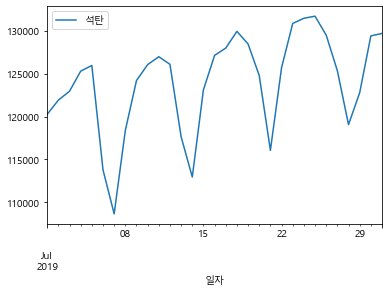

In [81]:
train.plot()

In [82]:
train.isnull().sum()

석탄    0
dtype: int64

In [100]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

#(ar=2,차분=0, ma=2)파라미터로 arima모델을 학습
model=ARIMA(train['석탄'], order=(4,2,2))
model_fit=model.fit(trend='nc',full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D2.석탄   No. Observations:                   29
Model:                 ARIMA(4, 2, 2)   Log Likelihood                -280.162
Method:                       css-mle   S.D. of innovations           3149.233
Date:                Fri, 15 Oct 2021   AIC                            574.325
Time:                        11:52:09   BIC                            583.896
Sample:                    07-03-2019   HQIC                           577.323
                         - 07-31-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
ar.L1.D2.석탄     0.5828      0.152      3.837      0.000       0.285       0.881
ar.L2.D2.석탄    -0.7973      0.178     -4.484      0.000      -1.146      -0.449
ar.L3.D2.석탄     0.1949      0.175      1.111    

<AxesSubplot:xlabel='일자'>

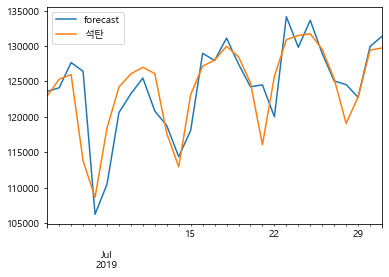

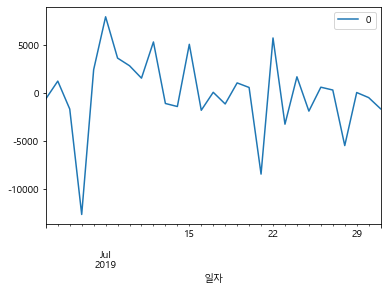

In [101]:
fig=model_fit.plot_predict()
residuals=pd.DataFrame(model_fit.resid)
residuals.plot()

In [93]:
import itertools
p=d=q=range(0,5)
pdq=list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [94]:
import warnings
warnings.filterwarnings('ignore')

for param in pdq:
    try:
        model_arima=ARIMA(train.석탄.values, order=param)
        model_arima_fit=model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 628.2895914633227
(0, 0, 1) 610.1091792001937
(0, 0, 2) 611.2342769234829
(0, 0, 3) 613.15828079911
(0, 0, 4) 611.5990598268576
(0, 1, 0) 604.5507497369704
(0, 1, 1) 602.8758041089616
(0, 1, 2) 592.0691400008808
(0, 1, 3) nan
(0, 1, 4) nan
(0, 2, 0) 599.5240373485079
(0, 2, 1) 590.9031674598922
(0, 2, 2) nan
(0, 2, 3) 581.8562297895481
(0, 2, 4) 583.7858379075601
(1, 0, 0) 619.0367040952231
(1, 0, 1) 611.2905850905582
(1, 0, 2) 616.8100068597946
(1, 0, 3) 616.792830745579
(1, 0, 4) 653.2314474013458
(1, 1, 0) 605.4992153448823
(1, 1, 1) 601.7839596537196
(1, 1, 2) 593.7836057718928
(1, 1, 3) 595.6854514861295
(1, 1, 4) 593.451693241512
(1, 2, 0) 601.0550308891819
(2, 0, 0) 611.4252489972922
(2, 0, 1) 612.5791776102127
(2, 0, 2) 614.2142597362147
(2, 1, 0) 600.1307656762717
(2, 1, 1) 590.9994067980628
(2, 1, 2) 588.6119655583747
(2, 2, 0) 595.9685302422197
(2, 2, 2) 582.0306596008589
(3, 0, 0) 613.0266759779857
(3, 0, 1) 633.0877440393099
(3, 0, 2) 608.1350304374904
(3, 1, 0) 

In [102]:
forecast_data=model_fit.forecast(steps=11) #학습데이터 셋으로 부터 10일 뒤를 예측

pred_y=forecast_data[0].tolist()
test_y=test.석탄.values #실제 10일의 미세먼지 데이터

In [103]:
pred_y

[129696.23717869948,
 127784.2463875562,
 122137.16590413112,
 119348.25235065552,
 121016.22978196568,
 123340.44056221626,
 125164.02019569771,
 125424.11931987082,
 122778.43694528122,
 119216.99339003745,
 117417.10955785228]

In [104]:
test_y

array([128717, 127716, 124408, 122445, 129004, 130098, 131304, 131583,
       132284, 127415, 122518], dtype=int64)

In [105]:
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt

rmse=sqrt(mean_squared_error(pred_y,test_y))
print(rmse)

5911.410130370109


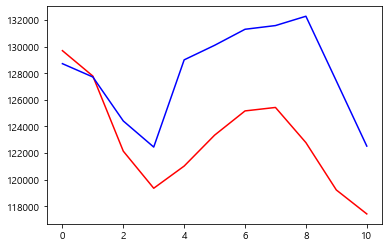

In [106]:
plt.plot(pred_y,color='red')
plt.plot(test_y,color='blue')